In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [298]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')
sales = sales.round(2)
sales.columns = sales.columns.str.capitalize()
sales.columns = sales.columns.str.replace(' ', '_')
sales.head()

,Invoice_id,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,Cogs,Gross_margin_percentage,Gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.3


In [299]:
#adding formated date column
sales['Date_formatted'] = pd.to_datetime(sales['Date'])

In [300]:
#adding seasons to dataset column
sales['season'] = (sales['Date_formatted'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

sales['season_name'] = sales['season'].map(seasons)

In [301]:
#converting obj to datetime
sales['Time'] = pd.to_datetime(sales['Time'], format='%H:%M').dt.time
sales['Hour'] = pd.to_datetime(sales['Time'], format='%H:%M:%S').dt.hour


In [302]:
#creating mesuare of part of datetime
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
sales['time_of_day_draft'] = pd.cut(sales['Hour'], bins=b, labels=l, include_lowest=True)

def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

sales['time_of_day'] = sales['Hour'].apply(f)

In [303]:
#drop duplicate after creating measure of daytime
sales.drop(['time_of_day_draft'], axis=1, inplace= True)

In [305]:
#adding column Month and Day
sales['Month'] = sales['Date_formatted'].dt.month
sales['Day'] = sales['Date_formatted'].dt.day

In [306]:
#checking for missing values
na_cols = sales.isna().sum()
na_cols

Invoice_id                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
Cogs                       0
Gross_margin_percentage    0
Gross_income               0
Rating                     0
Date_formatted             0
season                     0
season_name                0
Hour                       0
time_of_day                0
Month                      0
Day                        0
dtype: int64

In [307]:
#part for repeatable values
low_variance = [] #creating a list to contain the names of columns

for col in sales._get_numeric_data(): #loop through all numeric values
    minimum = np.min(sales[col]) #takes the min 
    ninety_perc = np.percentile(sales[col], 90) #takes the 90th percentile
    if ninety_perc == minimum: #if they are equal it means that 90% of values are the same
     low_variance.append(col) #appends name of this columns

print(low_variance) #not found

['Gross_margin_percentage']


In [308]:
#searching for duplicates
duplicat = sales.duplicated(keep=False)
len(duplicat)

for row in duplicat.keys():
    if row == True:
        print(row, duplicat[row])

1 False


In [309]:
#checking numeric values in our data
round(sales.describe()[['Unit_price', 'Quantity', 'Tax_5%','Total','Cogs',	'Gross_margin_percentage',
	'Gross_income',	'Rating']], 2)

,Unit_price,Quantity,Tax_5%,Total,Cogs,Gross_margin_percentage,Gross_income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.93,124.42,118.50,4.76,5.93,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.44,471.35,448.90,4.76,22.44,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


<AxesSubplot:>

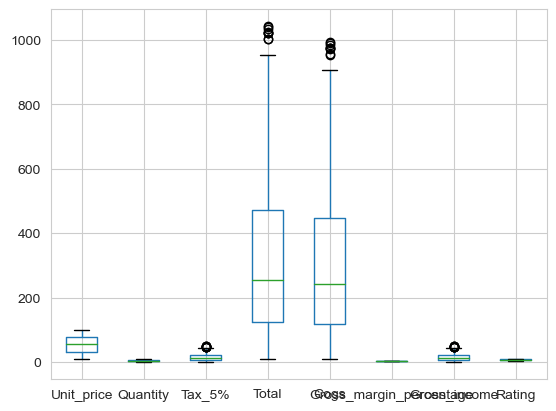

In [310]:
#checking outliers of all numeric colomns
numeric_col = ['Unit_price', 'Quantity', 'Tax_5%','Total','Cogs',	'Gross_margin_percentage',
	'Gross_income',	'Rating']
sales.boxplot(numeric_col)

In [311]:
#finding max of product line categories
top_10 = sales.groupby( 'Product_line')[['Total']].agg('max').sort_values(['Total'], ascending=False)
top_10.head(10)

,Total
Product_line,
Fashion accessories,1042.65
Food and beverages,1034.46
Home and lifestyle,1023.75
Sports and travel,1002.12
Health and beauty,950.25
Electronic accessories,942.45


In [312]:
#finding sales per city and branches
city_sale = sales.groupby( ['City', 'Branch'] )[['Total']].agg('count').sort_values(['Total'], ascending=False)
city_sale.head(10)

,,Total
City,Branch,
Yangon,A,340
Mandalay,B,332
Naypyitaw,C,328


In [313]:
#finding variation of clients type
clients = sales.groupby( ['Customer_type', 'Gender', 'Payment'] )[['Total']].agg('count').sort_values(['Total'], ascending=False)
clients.head(10)

Total
Customer_type Gender Payment           
Normal        Male   Ewallet        105
Member        Female Cash            90
                     Credit card     90
Normal        Female Cash            88
              Male   Cash            88
Member        Male   Credit card     82
              Female Ewallet         81
              Male   Ewallet         80
Normal        Female Ewallet         79
Member        Male   Cash            78

In [314]:
#average sales for each month
aver_month = sales.groupby( ['Month'] )[['Total']].agg('count').sort_values(['Total'], ascending=False)
aver_month.head(10)

,Total
Month,
1,352
3,345
2,303


In [317]:
#total of profits and sales for all our categories of sales
round(sales.pivot_table(index=["Product_line"], values=["Total",'Cogs', 'Gross_income'], aggfunc=np.sum), 2)

,Cogs,Gross_income,Total
Product_line,,,
Electronic accessories,51750.03,2587.53,54337.52
Fashion accessories,51719.90,2585.99,54305.88
Food and beverages,53471.28,2673.58,56144.86
Health and beauty,46851.18,2342.64,49193.81
Home and lifestyle,51297.06,2564.80,53861.87
Sports and travel,52497.93,2624.97,55122.88


In [ ]:
#sales by day for every month
sales_by_day= round(sales.pivot_table(index=["Month", 'Day'], values=["Total"], aggfunc=np.sum), 2)
sales_by_day

Total
Month Day         
1     1    4745.19
      2    1945.49
      3    2078.11
      4    1623.68
      5    3536.68
...            ...
3     26   1962.51
      27   2902.81
      28   2229.42
      29   4023.25
      30   4487.06

[89 rows x 1 columns]

In [ ]:
#average sale for month
ave_sales_by_day = round(sales.pivot_table(index=['Day'], values=["Total"], aggfunc=np.average), 2).reset_index()
ave_sales_by_day

,Day,Total
0,1,350.86
1,2,316.17
2,3,344.42
3,4,274.40
4,5,312.16
5,6,291.28
6,7,302.65
7,8,329.36
8,9,372.09
9,10,308.29


### Average sales per day for 3 month

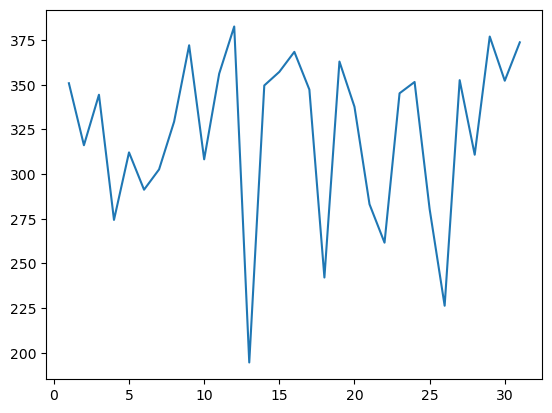

In [ ]:
plt.plot(ave_sales_by_day['Day'], ave_sales_by_day['Total'])

<AxesSubplot:xlabel='Day', ylabel='Total'>

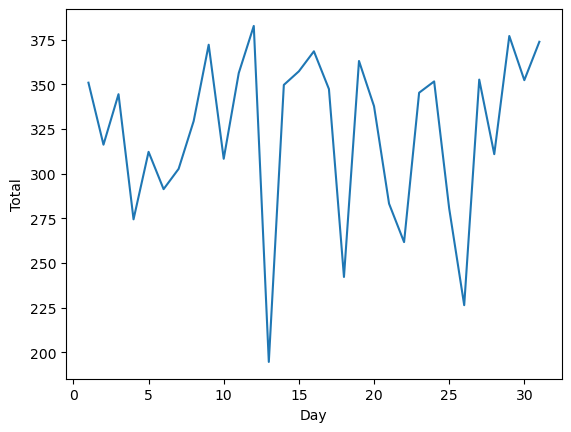

In [ ]:
sns.lineplot(data = ave_sales_by_day, x = 'Day', y='Total')

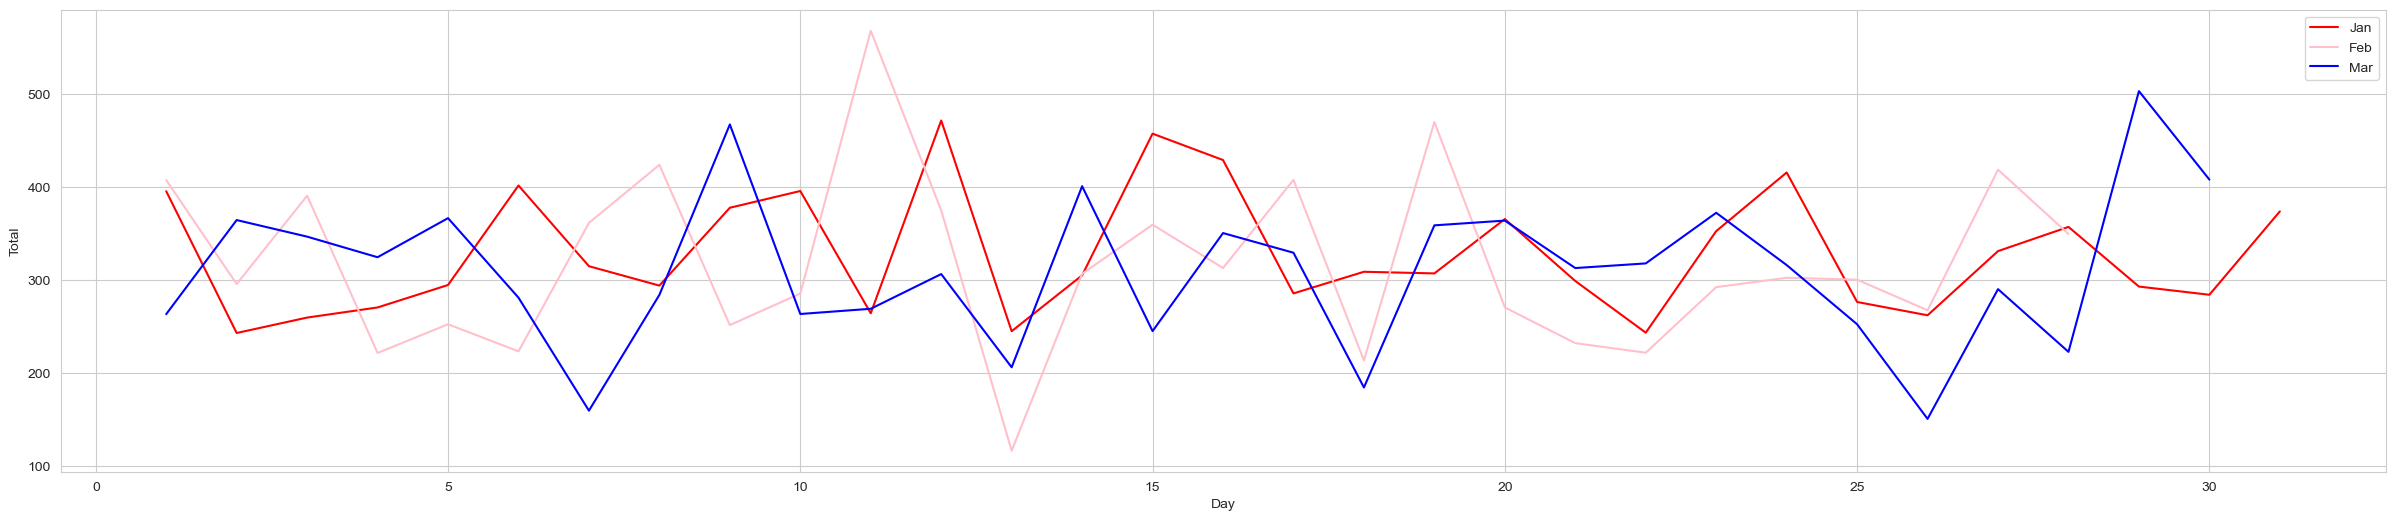

In [318]:
ave_sales_by_day_by_month = round(sales.pivot_table(index=['Month','Day'], values=["Total"], aggfunc=np.average), 2).reset_index()

month_1 = ave_sales_by_day_by_month[ave_sales_by_day_by_month['Month'] == 1]
month_2 = ave_sales_by_day_by_month[ave_sales_by_day_by_month['Month'] == 2]
month_3 = ave_sales_by_day_by_month[ave_sales_by_day_by_month['Month'] == 3]

# plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (30, 6))
# plt.figure(figsize = (54, 6))
sns.lineplot(data = month_1, x = 'Day', y='Total', color = 'red', legend = 'full')
sns.lineplot(data = month_2, x = 'Day', y='Total', color = 'pink',legend = 'full')
sns.lineplot(data = month_3, x = 'Day', y='Total', color = 'blue', legend = 'full')
ax.legend(labels = ['Jan','Feb','Mar'])


### Average transaction per month across 3 month

In [319]:
ave_trans_by_day = round(sales.pivot_table(index=['Day'], values=["Invoice_id"], aggfunc=np.count_nonzero), 2).reset_index()

<BarContainer object of 31 artists>

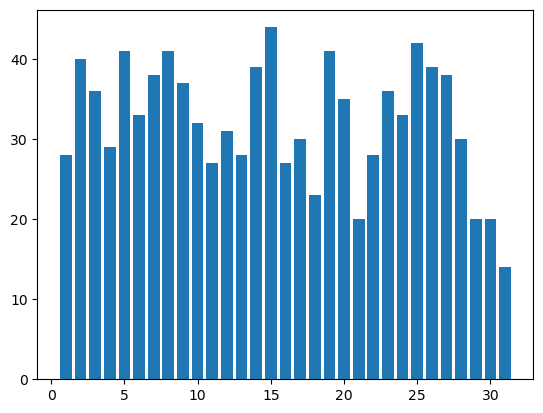

In [ ]:
plt.bar(ave_trans_by_day['Day'], ave_trans_by_day['Invoice_id'])

<AxesSubplot:xlabel='Day', ylabel='Invoice_id'>

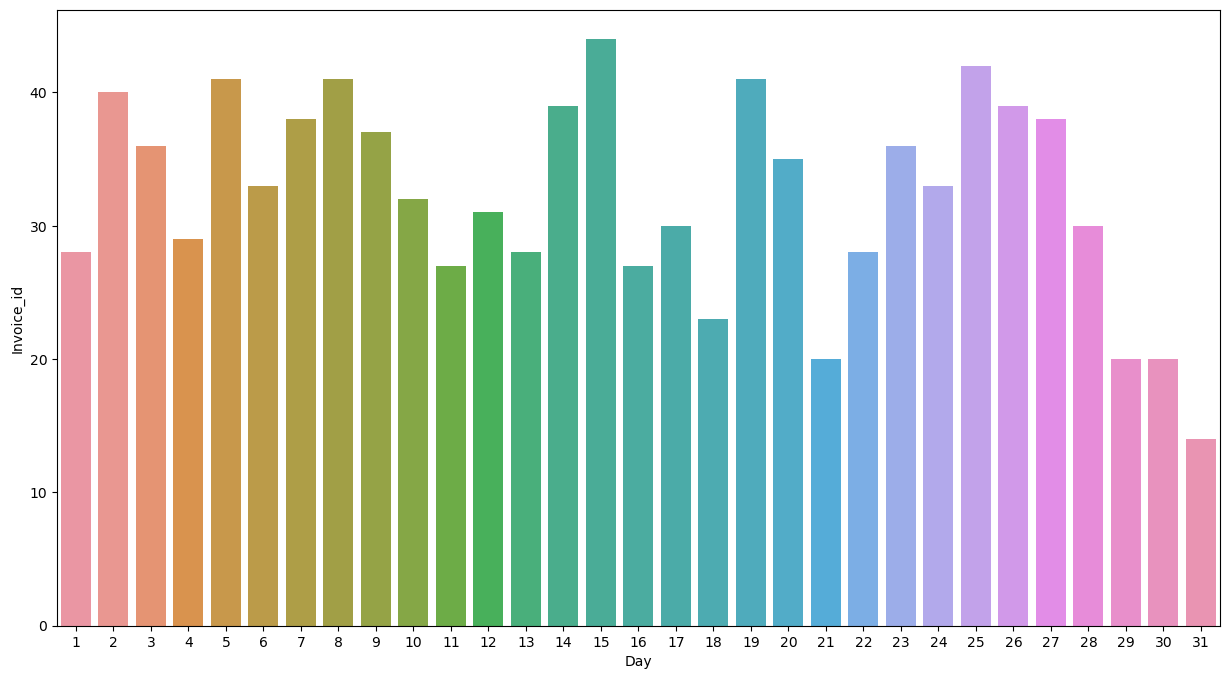

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = ave_trans_by_day, x = 'Day', y='Invoice_id')

### Scatter rating vs total sales / quantity

In [334]:
# creating a list of labels to assing to bin
profit_labels = ['Very low', 'Low', 'Moderate', 'High', 'Very High']


bins = pd.qcut(sales['Rating'], 5, labels = profit_labels)

#add bins to dataframe
sales = pd.concat([sales, bins], axis = 1).reset_index() #axis indicates the column



In [335]:
#fixing double name of columns
sales.columns = ['index', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Date_formatted', 'season', 'season_name', 'Hour',
       'time_of_day', 'Month', 'Day', 'rating_label']

sales.drop('index', axis=1, inplace=True)
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross income,Rating,Date_formatted,season,season_name,Hour,time_of_day,Month,Day,rating_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,...,26.14,9.1,2019-01-05,1,Winter,13,Noon,1,5,Very High
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,...,3.82,9.6,2019-03-08,2,Spring,10,Morning,3,8,Very High
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,...,16.22,7.4,2019-03-03,2,Spring,13,Noon,3,3,Moderate
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,...,23.29,8.4,2019-01-27,1,Winter,20,Evening,1,27,High
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,...,30.21,5.3,2019-02-08,1,Winter,10,Morning,2,8,Low


In [188]:
for_scat = round(sales.pivot_table(index=['rating_label'], values=["Total"], aggfunc=np.count_nonzero), 2).reset_index()
for_scat

,rating_label,Total
0,Very low,210
1,Low,197
2,Moderate,193
3,High,204
4,Very High,196


In [189]:
for_scatter = sales.groupby( ['rating_label'] )[['Total']].agg('count').sort_values(['Total'], ascending=False)
for_scatter

,Total
rating_label,
Very low,210
High,204
Low,197
Very High,196
Moderate,193


### Rating vs quantity sold

(array([365.,   0., 280.,   0., 355.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

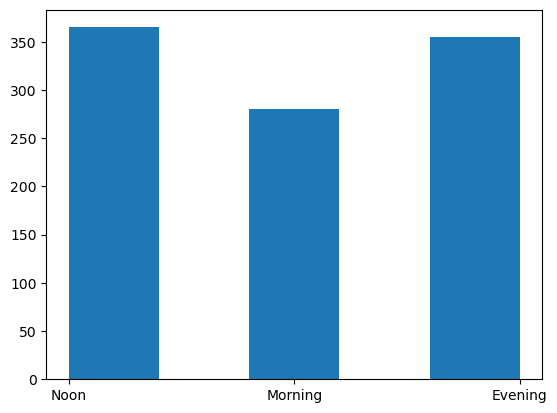

In [190]:
plt.hist(sales['time_of_day'], bins = 5)

<AxesSubplot:xlabel='time_of_day', ylabel='Total'>

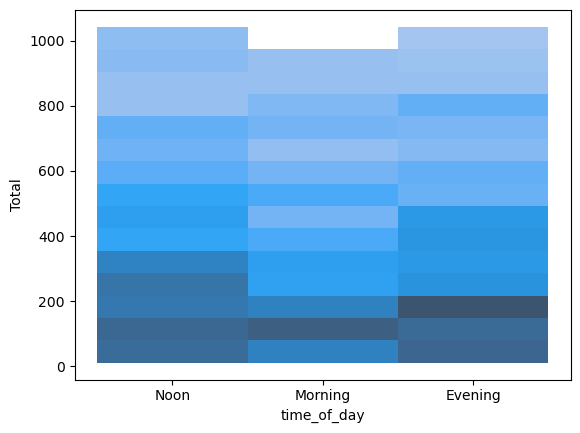

In [195]:
sns.histplot(data=sales, x='time_of_day', y='Total')

### Sales based on Rating split by Customer Type

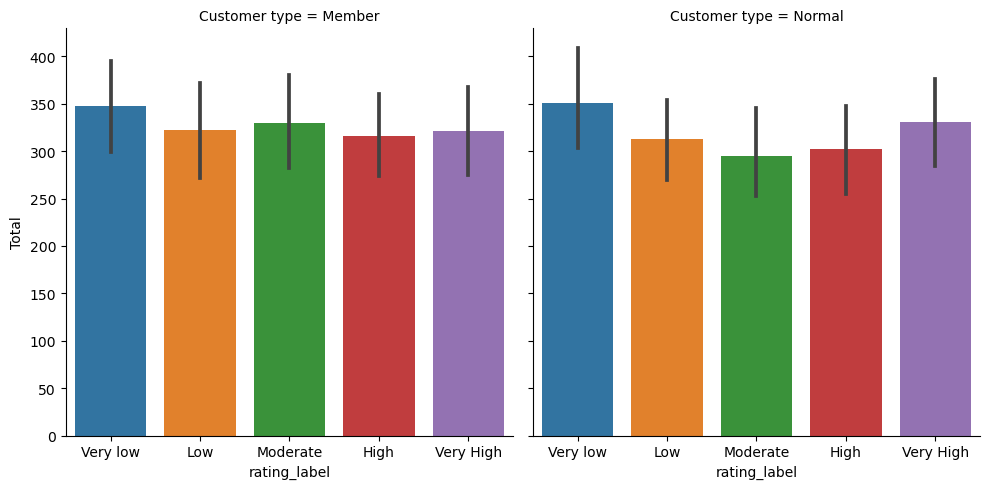

In [196]:
sns.catplot(data=sales, x='rating_label', y='Total', col = 'Customer type', kind = 'bar')

### Values per Transaction based on Payment type


In [321]:
ratio_total_invoice = round(sales.pivot_table(index=['Payment'], values=['Total', "Invoice_id"], aggfunc={'Total': np.sum, 'Invoice_id':np.count_nonzero}), 2).reset_index()
ratio_total_invoice['VPT'] = round((ratio_total_invoice['Total']/ratio_total_invoice['Invoice_id']), 2)
ratio_total_invoice

,Payment,Invoice_id,Total,VPT
0,Cash,344,112206.58,326.18
1,Credit card,311,100767.08,324.01
2,Ewallet,345,109993.16,318.82


([<matplotlib.patches.Wedge at 0x29160887d00>,
 [Text(0.5073034016037891, 0.9760344557039085, 'Cash'),
  Text(-1.0997450482315485, -0.02368182615823883, 'Credit card'),
  Text(0.5281988019720175, -0.9648865350886215, 'Ewallet')],
 [Text(0.27671094632933946, 0.53238243038395, '34.7%'),
  Text(-0.5998609353990264, -0.012917359722675726, '31.2%'),
  Text(0.28810843743928227, -0.5263017464119754, '34.1%')])

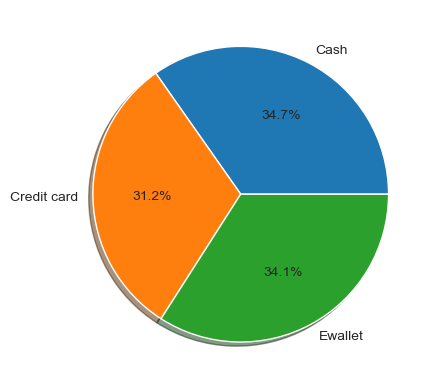

In [295]:
labels = ['Cash', 'Credit card', 'Ewallet']
plt.pie(ratio_total_invoice['Total'],autopct='%1.1f%%', labels=labels, shadow=True)


In [322]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig = px.line_polar(ratio_total_invoice, r=ratio_total_invoice['VPT'], theta=ratio_total_invoice['Payment'], line_close=True, width = 500, height = 400)
fig.show()

c:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Frequencies Values of transaction by time of the day

<AxesSubplot:xlabel='Total', ylabel='Density'>

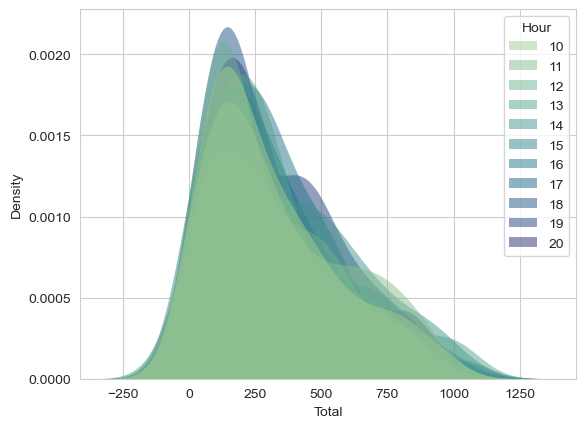

In [294]:
sns.kdeplot(
   data=sales, x="Total", hue="Hour",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

### 10. Rating vs Unit Price

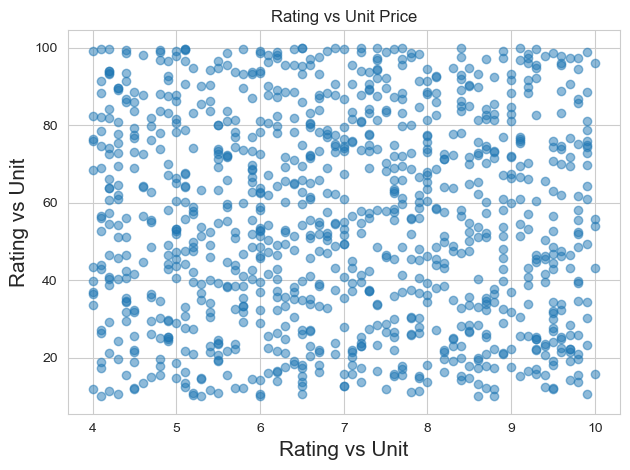

In [324]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
price_data = sales['Rating']
delta1 = sales['Unit_price']
# Marker size in units of points^2
#volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
#close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(price_data[:-1], delta1[1:], alpha=0.5)

ax.set_xlabel(r'Rating vs Unit', fontsize=15)
ax.set_ylabel(r'Rating vs Unit', fontsize=15)
ax.set_title('Rating vs Unit Price')

ax.grid(True)
fig.tight_layout()

plt.show()

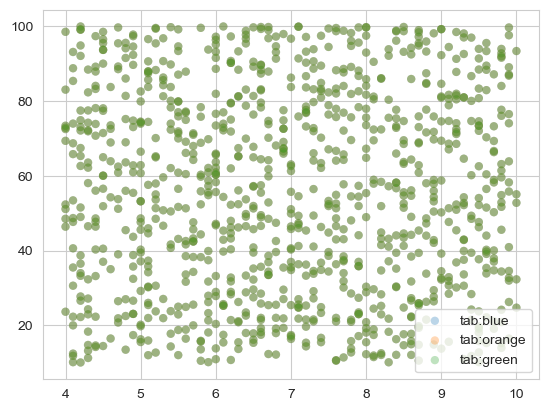

In [326]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    x = sales['Rating']
    y = sales['Unit_price']
    ax.scatter(x, y, c=color, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

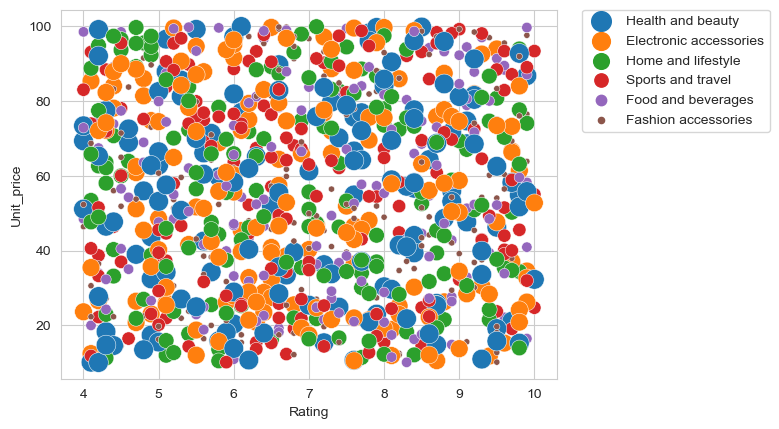

In [297]:
sns.scatterplot(data=sales, x ='Rating', y = 'Unit_price', hue = 'Product_line', 
size = 'Product_line', sizes=(20,200), legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Boxplot

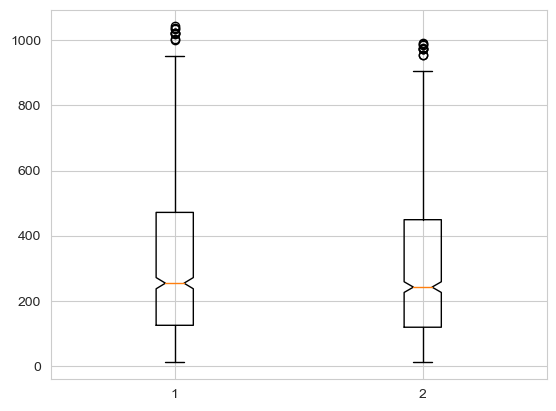

In [255]:
x = sales['Total']
y = sales['cogs']
fig, ax = plt.subplots()

ax.boxplot([x, y], notch=True)

plt.show()


### Rating vs Quantity & Sales 3D

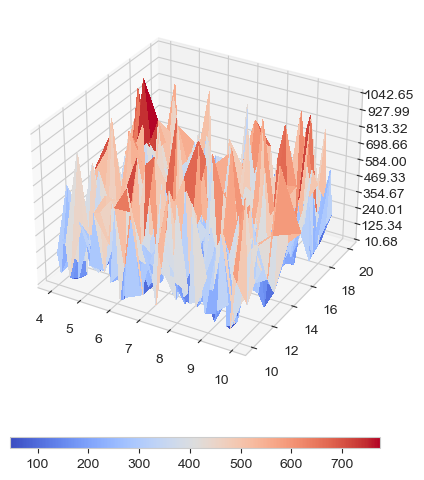

In [327]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = sales['Rating']
Y = sales['Hour']
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = sales['Total']
Z = sales['Total']

# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.

axins = inset_axes(ax,
                    width="100%",  
                    height="3%",
                    loc='lower center',
                    borderpad=-5
                   )

fig.colorbar(surf, shrink=0.3, aspect=10, cax=axins, orientation="horizontal")

plt.show()

### Descriptive statistic

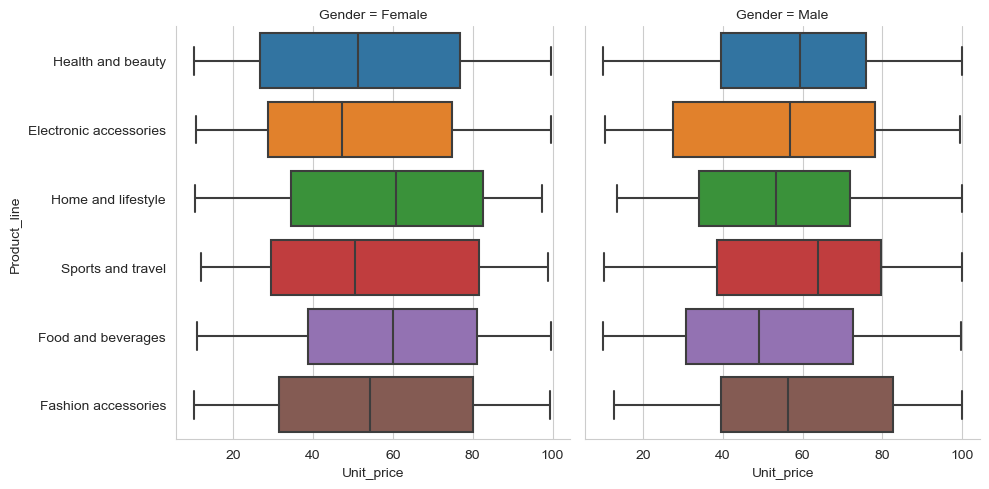

In [328]:
sns.catplot(data=sales, x='Unit_price', y='Product_line', col = 'Gender', kind = 'box')

{'whiskers': [<matplotlib.lines.Line2D at 0x29162d33d30>,
 'caps': [<matplotlib.lines.Line2D at 0x29162d33880>,
 'boxes': [<matplotlib.lines.Line2D at 0x29162d33be0>,
 'medians': [<matplotlib.lines.Line2D at 0x291290da970>,
 'fliers': [<matplotlib.lines.Line2D at 0x291290da0a0>,
 'means': []}

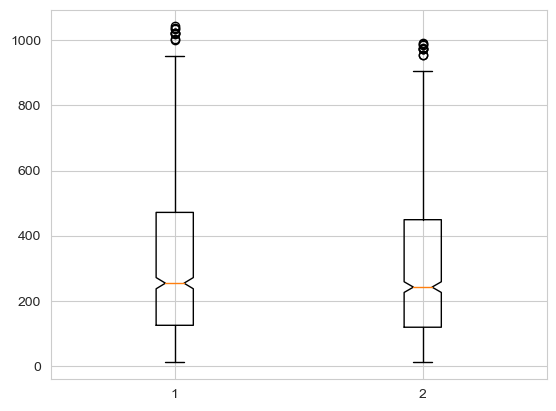

In [330]:
fig, ax = plt.subplots()
plt.boxplot([sales['Total'], sales['Cogs']], notch = True, meanline = True)


In [336]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Date_formatted', 'season', 'season_name', 'Hour',
       'time_of_day', 'Month', 'Day', 'rating_label'],
      dtype='object')

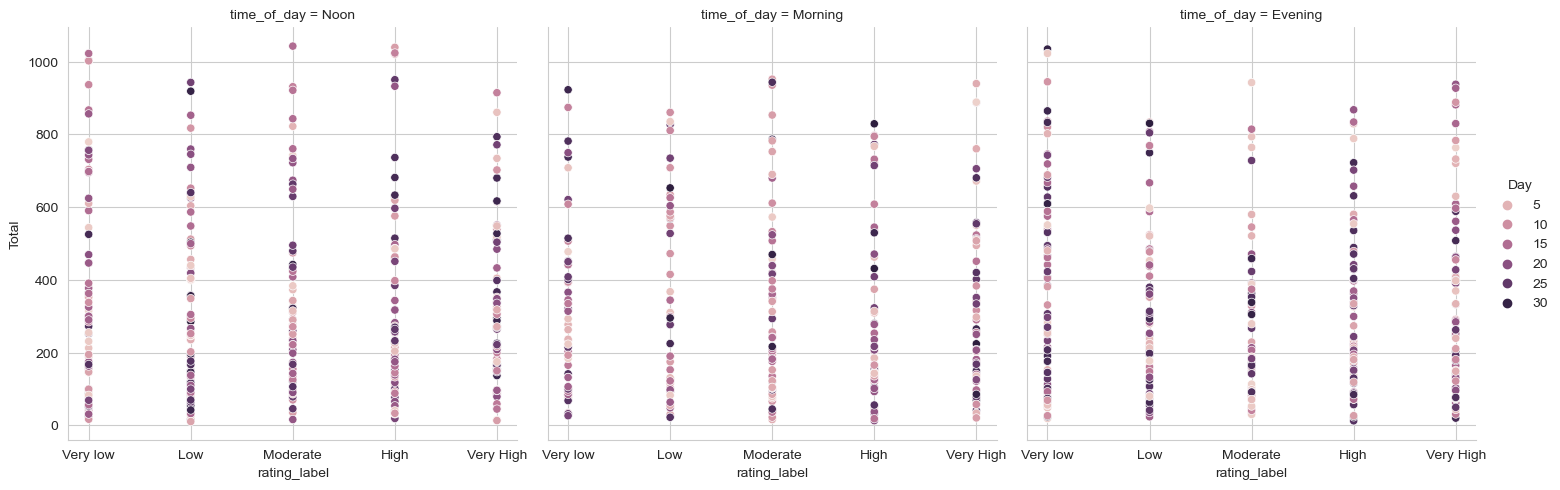

In [337]:
sns.relplot(data=sales, x="rating_label", y="Total", hue="Day", col="time_of_day")

<AxesSubplot:xlabel='Total', ylabel='rating_label'>

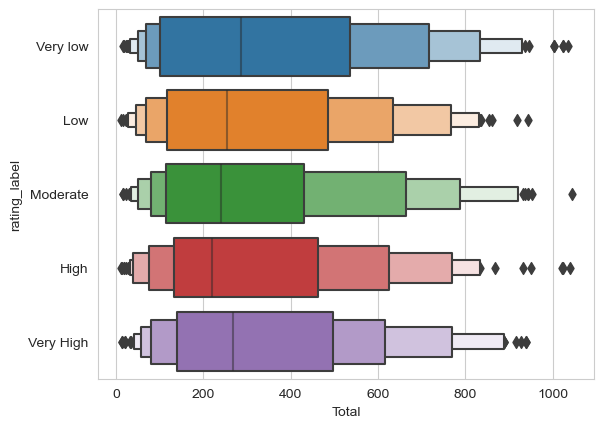

In [338]:
sns.boxenplot(data=sales, x="Total", y="rating_label", scale = 'linear')

<AxesSubplot:>

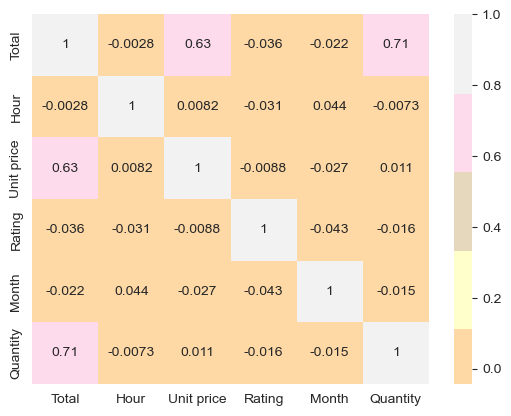

In [340]:
s_sales = sales[['Total','Hour', 'Unit price', 'Rating', 'Month', 'Quantity']]
sns.heatmap(s_sales.corr(), annot=True, cmap='Pastel1', center=0)

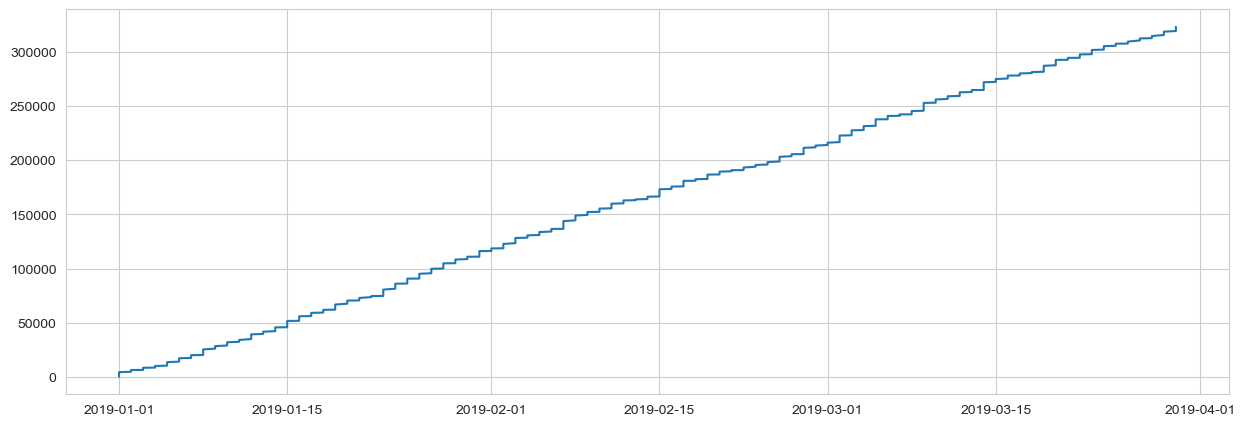

In [341]:
sales.sort_values(['Date_formatted','Hour'], inplace=True)
sales['Cummulative_Sales'] = sales['Total'].cumsum()
plt.figure(figsize = (15,5))
plt.plot(sales['Date_formatted'], sales['Cummulative_Sales'])

In [342]:
sales.to_csv('Supermarketsales_Final.csv')